# 01 Post process turbine simulation
## -- Flow Field --

In [2]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as ncdf
import pandas as pd
import os

In [ ]:
from moa_python.post_plane import Post_plane

## Case 005 with OpenFAST turbine

In [13]:
case_folder = '/projects/ssc/jfrederi/amr-wind-runs/IEA15MW/refined_regis'
hor_plane_file = 'post_processing/samplingPlane18000.nc'
ver_plane_file = 'post_processing/samplingSlice18000.nc'

Plane has 1 plane(s) in 801 time steps from 18000.0 to 19999.999999970896
Plane levels: [0.]


In [ ]:
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file)
hor_plane = Post_plane(full_filename_hor_plane)

Plotting u velocity for plane at location 240 at time 19500
Nearest height to 240 is 0.0
Nearest time to 19500 is 19499.999999978172
Returning u velocity plane for slice at 0.0 at time 19499.999999978172


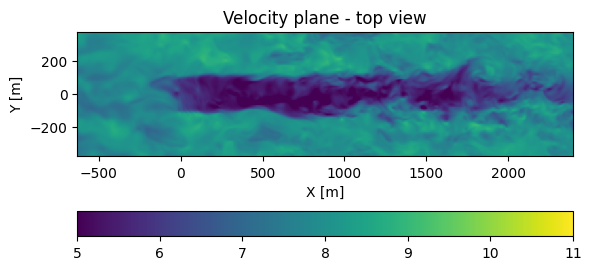

In [11]:
hor_plane.set_origin(x = 2560, y = 2560, frame = 'amr-wind')
ax = hor_plane.plot_plane(240, 19500, vmin=5., vmax=11.)
ax.set_title("Velocity plane - top view");


In [14]:

full_filename_slice = os.path.join(case_folder,ver_plane_file)
ver_plane = Post_plane(full_filename_slice)

Plane has 3 plane(s) in 801 time steps from 18000.0 to 19999.999999970896
Plane levels: [ 960. 1440. 1920.]


Plotting u velocity for plane at location 960.0 at time 19500
Nearest height to 960.0 is 960.0
Nearest time to 19500 is 19499.999999978172
Returning u velocity plane for slice at 960.0 at time 19499.999999978172
Plotting u velocity for plane at location 1440.0 at time 19500
Nearest height to 1440.0 is 1440.0
Nearest time to 19500 is 19499.999999978172
Returning u velocity plane for slice at 1440.0 at time 19499.999999978172
Plotting u velocity for plane at location 1920.0 at time 19500
Nearest height to 1920.0 is 1920.0
Nearest time to 19500 is 19499.999999978172
Returning u velocity plane for slice at 1920.0 at time 19499.999999978172


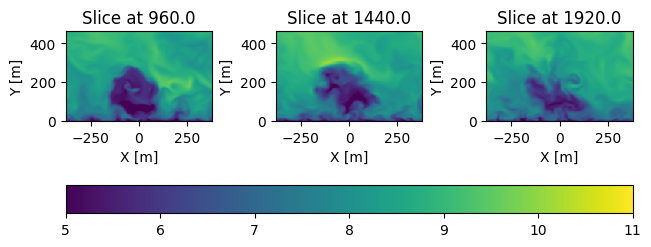

In [21]:
ver_plane.set_origin(center='x')
fig,ax = plt.subplots(1,ver_plane.z_N,constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_plane(ver_plane.z[n], 19500, ax = ax[n], vmin=5., vmax=11.)
    ax[n].set_title(f'Slice at {ver_plane.z[n]}')
    im = [obj for obj in ax[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if im:
        im.colorbar.remove()
fig.colorbar(im,ax=ax,location='bottom')